In [14]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from loads import *
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

PATH_FOLDER = "MovieSummaries/"

# Plot for Countries

## Bar chart for mean revenue

In [15]:
# Load the data
path = "csv_for_story/countries_df_grouped_jerry.csv"
movie_countries_df_grouped = pd.read_csv(path)

<ipython-input-16-ef8d9d0170f1>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Revenue with inflation', data=movie_countries_categories_sorted, palette=colors, ax=ax1)
<ipython-input-16-ef8d9d0170f1>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='log_revenues', data=movie_countries_categories_sorted, palette=colors, ax=ax2)


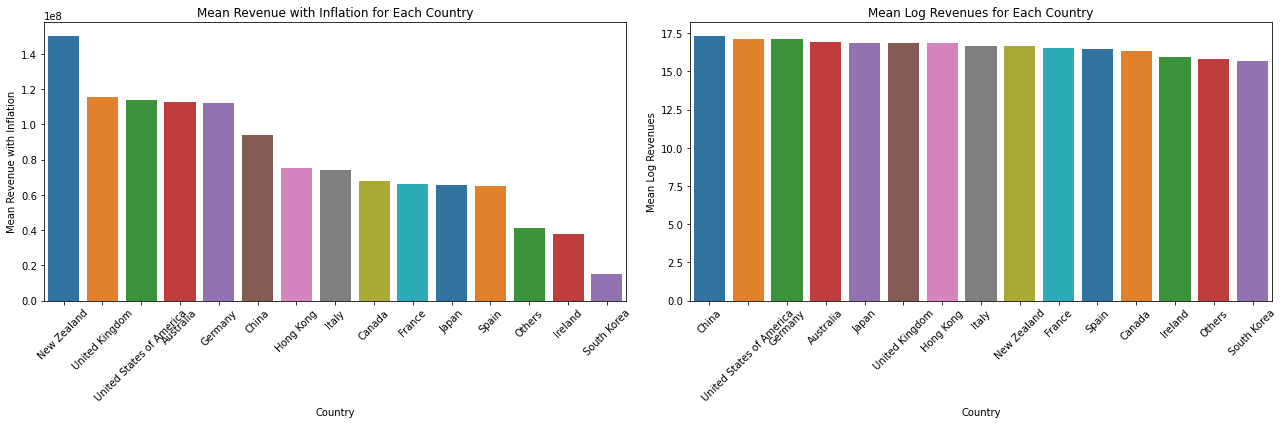

In [16]:
# Set a threshold count for the number of movies in a country
threshold = 50

# Select countries with a count greater than the threshold
top_movie_countries_df = movie_countries_df_grouped[movie_countries_df_grouped["count"] > threshold]

# Select countries with a count less than or equal to the threshold
other_movie_country = movie_countries_df_grouped[movie_countries_df_grouped["count"] <= threshold]

# Calculate the average revenue and log revenue of countries not in the list
others_revenue_inflation = (np.sum(other_movie_country['Revenue with inflation'] * other_movie_country['count'])) / other_movie_country['count'].sum()
others_revenue_log = (np.sum(other_movie_country['log_revenues'] * other_movie_country['count'])) / other_movie_country['count'].sum()

# Calculate the counts of countries not in the list
others_count = other_movie_country['count'].sum()

# Create a new row for 'Others' with the calculated average revenues
others_row = pd.DataFrame({
    'Country': ['Others'], 
    'count': [others_count], 
    'Revenue with inflation': [others_revenue_inflation],
    'log_revenues': [others_revenue_log]
})

# Concatenate the new row to the existing DataFrame
movie_countries_categories = pd.concat([top_movie_countries_df, others_row], ignore_index=True)

# Sort the DataFrame by 'Revenue with inflation' in descending order
movie_countries_categories_sorted = movie_countries_categories.sort_values('Revenue with inflation', ascending=False)

# Set up a multi-plot grid for two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Use different colors for each plot
colors = plt.cm.tab10.colors

# Create a bar plot for 'Revenue with inflation'
sns.barplot(x='Country', y='Revenue with inflation', data=movie_countries_categories_sorted, palette=colors, ax=ax1)
ax1.set_title('Mean Revenue with Inflation for Each Country')
ax1.set_xlabel('Country')
ax1.set_ylabel('Mean Revenue with Inflation')
ax1.tick_params(axis='x', rotation=45)

# Sort the DataFrame by 'log_revenues' in descending order
movie_countries_categories_sorted = movie_countries_categories.sort_values('log_revenues', ascending=False)

# Create a bar plot for 'log_revenues'
sns.barplot(x='Country', y='log_revenues', data=movie_countries_categories_sorted, palette=colors, ax=ax2)
ax2.set_title('Mean Log Revenues for Each Country')
ax2.set_xlabel('Country')
ax2.set_ylabel('Mean Log Revenues')
ax2.tick_params(axis='x', rotation=45)

# Ensure everything fits well in the plot area
plt.tight_layout()

# Show the plot
plt.show()

The mean revenue per country depicted in the bar chart shows substantial variation across different countries as origins. The United States of America, United Kingdom, and New Zealand demonstrate particularly high mean revenues, indicating a strong performance for films from these countries. Conversely, countries like France and Germany show relatively lower mean revenues, though they still contribute significantly to the global film industry. Especially New Zealand stands out with the highest mean revenue. In contrast, South Korea's mean revenue is on the lowest side. However, when considering the mean log revenue, a more balanced picture shows as the figures across countries are much closer to each other, with China having the highest mean log revenue.

In [17]:
# Load the data
path = "csv_for_story/countries_df_onehot_jerry.csv"
movie_countries_df = pd.read_csv(path)

<ipython-input-24-634061fa5994>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Country', y='log_revenues', data=filtered_df_log, order=sorted_df_log_revenues['Country'], ci=95, capsize=.2, palette='viridis', ax=axes[0, 0])
<ipython-input-24-634061fa5994>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='log_revenues', data=filtered_df_log, order=sorted_df_log_revenues['Country'], ci=95, capsize=.2, palette='viridis', ax=axes[0, 0])
<ipython-input-24-634061fa5994>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='log_revenues', data=filtered_df_log, order=sorted_df_log_revenues['Country'

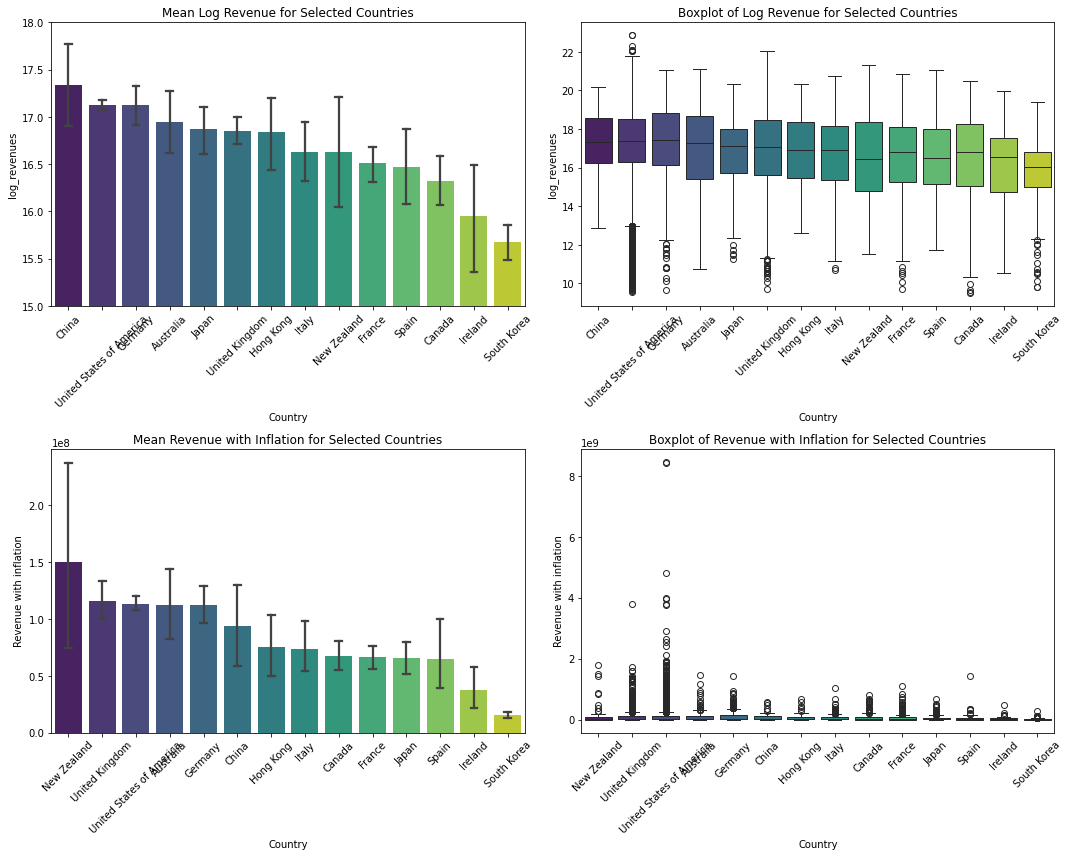

In [24]:
# Convert the string representation of the countries list into an actual list
movie_countries_df['Countries_List'] = movie_countries_df['Movie Countries'].apply(lambda x: ast.literal_eval(x))

# Define the selected countries
selected_countries = ['United States of America', 'United Kingdom', 'France', 'Germany', 'Canada', 
                      'South Korea', 'Japan', 'Australia', 'Italy', 'Spain', 'Hong Kong', 'New Zealand', 
                      'Ireland', 'China']

# Create one-hot encoded columns for each selected country
for country in selected_countries:
    movie_countries_df[country] = movie_countries_df['Countries_List'].apply(lambda x: 1 if country in x else 0)

# Melt the DataFrame for selected countries
melted_df_log = movie_countries_df.melt(id_vars=['log_revenues'], value_vars=selected_countries, var_name='Country', value_name='Is_Present')
filtered_df_log = melted_df_log[melted_df_log['Is_Present'] == 1]

melted_df_rev = movie_countries_df.melt(id_vars=['Revenue with inflation'], value_vars=selected_countries, var_name='Country', value_name='Is_Present')
filtered_df_rev = melted_df_rev[melted_df_rev['Is_Present'] == 1]

# Sorting the data by mean revenue in descending order for visualization
sorted_df_log_revenues = filtered_df_log.groupby('Country')['log_revenues'].mean().sort_values(ascending=False).reset_index()
sorted_df_revenue_inflation = filtered_df_rev.groupby('Country')['Revenue with inflation'].mean().sort_values(ascending=False).reset_index()

# Set up a multi-plot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2 rows, 2 columns

# Plot the mean log revenue with error bars and 95% confidence interval
sns.barplot(x='Country', y='log_revenues', data=filtered_df_log, order=sorted_df_log_revenues['Country'], ci=95, capsize=.2, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Mean Log Revenue for Selected Countries')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylim(15, 18)  # Zoom in y-axis

# Plot the boxplot for log revenue
sns.boxplot(x='Country', y='log_revenues', data=filtered_df_log, order=sorted_df_log_revenues['Country'], palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Log Revenue for Selected Countries')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot the mean revenue with inflation with error bars and 95% confidence interval
sns.barplot(x='Country', y='Revenue with inflation', data=filtered_df_rev, order=sorted_df_revenue_inflation['Country'], ci=95, capsize=.2, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Mean Revenue with Inflation for Selected Countries')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot the boxplot for revenue with inflation
sns.boxplot(x='Country', y='Revenue with inflation', data=filtered_df_rev, order=sorted_df_revenue_inflation['Country'], palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Revenue with Inflation for Selected Countries')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The bar chart on the upper left shows the mean of the log revenue with 95% confidence interval in selected countries. China has a high mean log revenue, with a confidence interval stretching further upwards than other countries, which may indicate higher revenue performance or greater variability. Conversely, South Korea shows a lower mean log revenue, with a shorter confidence interval, which indicates more consistency around a lower mean.

The box plot on the upper right demonstrates the distribution of logarithmic movie revenues for selected countries. The median log revenue across countries seems relatively consistent, with some exceptions showing higher or lower median revenues. Countries like the United States of America have a wider range of log revenues, indicating variability in their movie revenues. While several countries shows many outliers on the lower end, only the United States of America shows some outliers on the upper end, which suggests it has movies with revenues much higher than the typical range, potentially because a large proportion of movies are produced in the United States of America.

The bar chart on the lower left illustrates the mean revenue with 95% confidence interval adjusted for inflation from movies in selected countries. New Zealand shows the highest mean revenue, while South Korea has a relatively lower mean revenue. Also, New Zealand's mean revenue appears significantly different from that of South Korea due to non-overlapping confidence intervals.

The box plot on the lower right displays the distribution of movie revenues adjusted for inflation for selected countries. The top of the scale reaches 1e9 (1 billion), with outliers on the upper end for the United States of America, and there is a higher level of variability in movie revenues than log ones.

# Plot for Languages

## Bar chart for mean revenue

In [19]:
# Load the data
path = "csv_for_story/languages_df_grouped_jerry.csv"
movie_languages_df_grouped = pd.read_csv(path)

<ipython-input-20-e564a8e15392>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='Revenue with inflation', data=movie_languages_categories_sorted, palette=colors, ax=ax1)
<ipython-input-20-e564a8e15392>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='log_revenues', data=movie_languages_categories_sorted, palette=colors, ax=ax2)


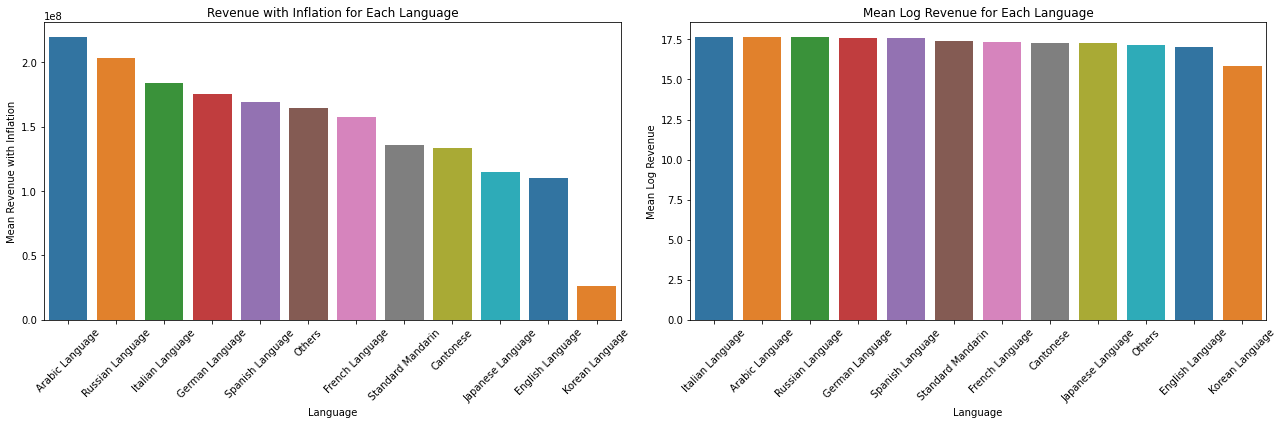

In [20]:
# Set a threshold count for the number of movies in a language
threshold = 50

# Select languages with a count greater than the threshold
top_movie_languages_df = movie_languages_df_grouped[movie_languages_df_grouped["count"] > threshold]

# Select languages with a count less than or equal to the threshold
other_movie_language = movie_languages_df_grouped[movie_languages_df_grouped["count"] <= threshold]

# Calculate the average revenue of languages not in the list
others_revenue_mean = (np.sum(other_movie_language['Revenue with inflation'] * other_movie_language['count'])) / other_movie_language['count'].sum()
others_log_revenue_mean = (np.sum(other_movie_language['log_revenues'] * other_movie_language['count'])) / other_movie_language['count'].sum()

# Calculate the counts of languages not in the list
others_count = other_movie_language['count'].sum()

# Create a new row for 'Others' with the calculated average revenue
others_row = pd.DataFrame({
    'Language': ['Others'], 
    'count': [others_count], 
    'Revenue with inflation': [others_revenue_mean],
    'log_revenues': [others_log_revenue_mean]
})

# Concatenate the new row to the existing DataFrame
movie_languages_categories = pd.concat([top_movie_languages_df, others_row], ignore_index=True)

# Use different colors for each genre
colors = plt.cm.tab10.colors

# Set up a multi-plot grid for two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Sort the DataFrame by 'Revenue with inflation' in descending order for the barplot
movie_languages_categories_sorted = movie_languages_categories.sort_values('Revenue with inflation', ascending=False)

# Create a bar plot for 'Revenue with inflation'
sns.barplot(x='Language', y='Revenue with inflation', data=movie_languages_categories_sorted, palette=colors, ax=ax1)
ax1.set_title('Revenue with Inflation for Each Language')
ax1.set_xlabel('Language')
ax1.set_ylabel('Mean Revenue with Inflation')
ax1.tick_params(axis='x', rotation=45)

# Sort the DataFrame by 'log_revenues' in descending order for the barplot
movie_languages_categories_sorted = movie_languages_categories.sort_values('log_revenues', ascending=False)

# Create a bar plot for 'log_revenues'
sns.barplot(x='Language', y='log_revenues', data=movie_languages_categories_sorted, palette=colors, ax=ax2)
ax2.set_title('Mean Log Revenue for Each Language')
ax2.set_xlabel('Language')
ax2.set_ylabel('Mean Log Revenue')
ax2.tick_params(axis='x', rotation=45)

# Ensure everything fits well in the plot area
plt.tight_layout()

# Show the plot
plt.show()



The left bar chart shows that languages like Arabic and Russian have higher mean revenues, while English and Korean categories show lower mean revenues. In the right bar chart, the log revenue shows a more even distribution across languages, because log transformation tends to compress the scale of large values. Similar to the left bar chart, Italian, Arabic, Russian, German and Spanish show higher mean log revenue, English and Korean show the lowest mean log revenue.

In [21]:
# Load the data
path = "csv_for_story/languages_df_onehot_jerry.csv"
movie_languages_df = pd.read_csv(path)

<ipython-input-22-f2eb1627e96e>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Language', y='log_revenues', data=filtered_df_log_revenues, order=sorted_df_log_revenues['Language'], ci=95, capsize=.2, palette='viridis', ax=axs[0, 0])
<ipython-input-22-f2eb1627e96e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='log_revenues', data=filtered_df_log_revenues, order=sorted_df_log_revenues['Language'], ci=95, capsize=.2, palette='viridis', ax=axs[0, 0])
<ipython-input-22-f2eb1627e96e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Language', y='log_revenues', data=filtered_df_log_revenues, order=so

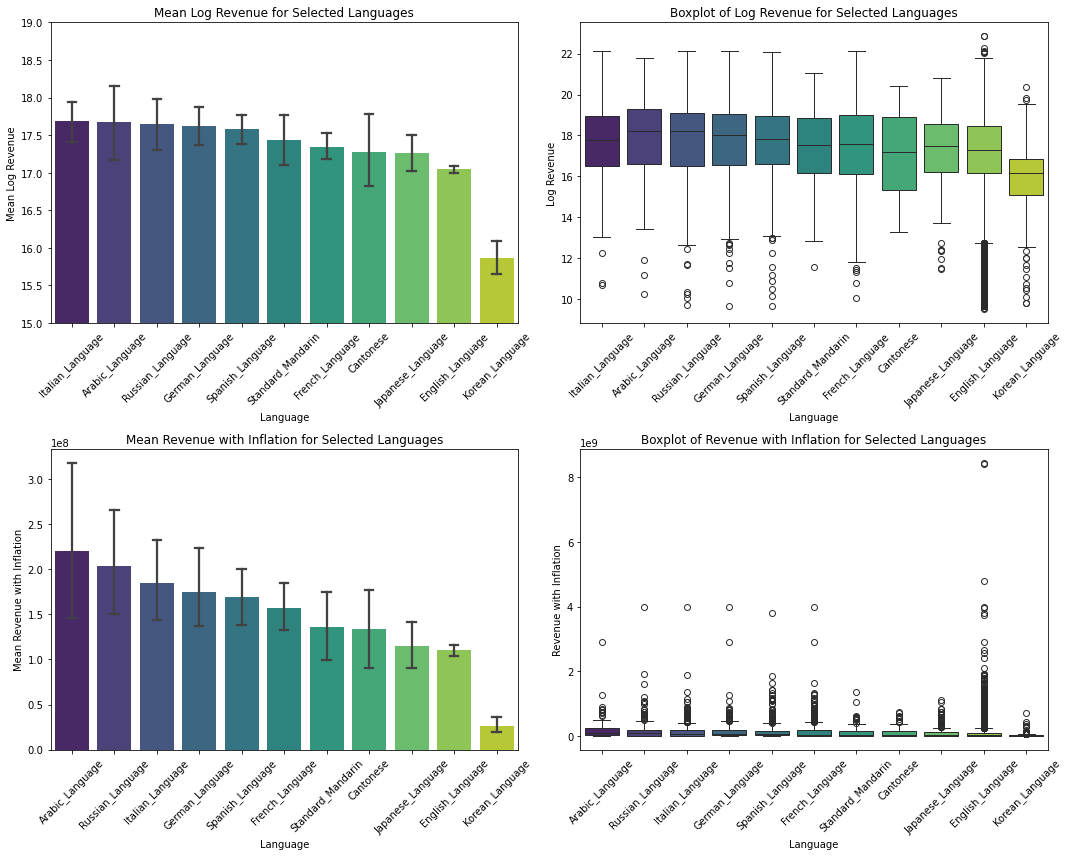

In [22]:
# Define the selected languages
selected_languages = ['Italian_Language', 'Arabic_Language', 'Russian_Language', 'German_Language', 
                      'Spanish_Language', 'Standard_Mandarin', 'French_Language', 'Cantonese', 
                      'Japanese_Language', 'English_Language', 'Korean_Language']

# Melt the DataFrame for selected languages
melted_df_log_revenues = movie_languages_df.melt(id_vars=['log_revenues'], value_vars=selected_languages, var_name='Language', value_name='Is_Present')
filtered_df_log_revenues = melted_df_log_revenues[melted_df_log_revenues['Is_Present'] == 1]

melted_df_revenue_inflation = movie_languages_df.melt(id_vars=['Revenue with inflation'], value_vars=selected_languages, var_name='Language', value_name='Is_Present')
filtered_df_revenue_inflation = melted_df_revenue_inflation[melted_df_revenue_inflation['Is_Present'] == 1]

# Sorting the data by mean revenue in descending order for visualization
sorted_df_log_revenues = filtered_df_log_revenues.groupby('Language')['log_revenues'].mean().sort_values(ascending=False).reset_index()
sorted_df_revenue_inflation = filtered_df_revenue_inflation.groupby('Language')['Revenue with inflation'].mean().sort_values(ascending=False).reset_index()

# Set up a multi-plot grid
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot the mean log revenue with error bars and 95% confidence interval
sns.barplot(x='Language', y='log_revenues', data=filtered_df_log_revenues, order=sorted_df_log_revenues['Language'], ci=95, capsize=.2, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Mean Log Revenue for Selected Languages')
axs[0, 0].set_xlabel('Language')
axs[0, 0].set_ylabel('Mean Log Revenue')
axs[0, 0].set_ylim(15, 19)  # Zooming in on the y-axis
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot the boxplot for log revenue
sns.boxplot(x='Language', y='log_revenues', data=filtered_df_log_revenues, order=sorted_df_log_revenues['Language'], palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Boxplot of Log Revenue for Selected Languages')
axs[0, 1].set_xlabel('Language')
axs[0, 1].set_ylabel('Log Revenue')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot the mean revenue with inflation with error bars and 95% confidence interval
sns.barplot(x='Language', y='Revenue with inflation', data=filtered_df_revenue_inflation, order=sorted_df_revenue_inflation['Language'], ci=95, capsize=.2, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Mean Revenue with Inflation for Selected Languages')
axs[1, 0].set_xlabel('Language')
axs[1, 0].set_ylabel('Mean Revenue with Inflation')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot the boxplot for revenue with inflation
sns.boxplot(x='Language', y='Revenue with inflation', data=filtered_df_revenue_inflation, order=sorted_df_revenue_inflation['Language'], palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of Revenue with Inflation for Selected Languages')
axs[1, 1].set_xlabel('Language')
axs[1, 1].set_ylabel('Revenue with Inflation')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The bar chart on the upper left shows the mean log revenue for each selected language with 95% confidence intervals. Italian has the highest average log revenue among the selected languages, but also a wide confidence interval, which indicates higher variability in revenue. In contrast, Korean has the lowest average log revenue among the selected languages and a narrow confidence interval, which indicates a consistent but lower revenue performance.

The box plot on the upper right demonstrates the distribution of logarithmic movie revenues for selected languages. English and Korean languages show a greater range and many outliers. In particular, English displays a wide range, which is expected given the large number of English language films, including both high-revenue and lower-revenue films. However, languages such as Standard Mandarin and Cantonese have a narrower inter-quartile range and fewer outliers, which implies a more consistent revenue performance across films.

The bar chart on the lower left illustrates the mean revenue with 95% confidence interval adjusted for inflation from movies in each selected language. Consistent with the pattern for the log revenue, Arabic, Russian, Italian are still languages with the highest average revenues; but there is also significant variability, possibly due to a few very successful films. Conversely, Korean has the smallest mean revenue and the smallest error bar, which means a lower but consistent market performance.

The box plot on the lower right displays the distribution of movie revenues adjusted for inflation across different languages. English displays a wide range of revenues at the upper end of the revenue spectrum, consistent with a large and diverse market with many films.